# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


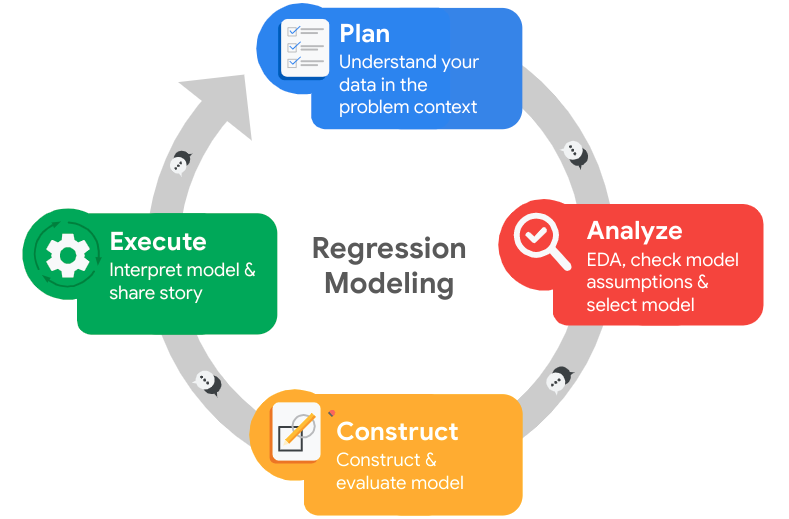

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




# PACE: PLAN — Capstone Project (Salifort Motors)

## Stakeholders

The primary stakeholders for this project are:

- Salifort Motors senior leadership team – They want to understand the drivers behind employee turnover and reduce HR-related costs.

- Human Resources (HR) department – They need actionable insights that can guide retention strategies and improve employee satisfaction.

- Team managers – They benefit from understanding workload, promotions, performance, and satisfaction trends among employees.

- Employees – Indirect stakeholders whose workplace experience may improve from the insights generated.

## Problem to Solve / Objective

The company is experiencing high employee turnover, which is costly and affects productivity.
The goal is to:

- Analyze factors contributing to employee departure.

- Build a predictive model that estimates the probability of an employee leaving.

- Generate actionable recommendations to improve retention, based on data patterns.

- This model should help HR proactively identify employees at high risk of leaving and implement targeted interventions (e.g., adjusting workloads, improving satisfaction, reviewing promotion policies).

## Initial Observations from Exploring the Dataset

From initial dataset exploration (15,000 rows, 10 columns):

- `satisfaction_level` ranges from 0 to 1. Early inspection shows many employees who left have lower satisfaction.

- `number_project` and `average_monthly_hours` seem correlated—employees with many projects tend to work more hours.

- `time_spend_company` shows a peak in departures around year 3–4.

- `Work_accident` and `promotion_last_5years` appear imbalanced (very few promotions).

- `salary` and `department` are categorical variables requiring encoding.

- The dependent variable left is categorical (binary), suitable for logistic regression or classification models.

These observations suggest potential areas influencing departure: workload, satisfaction, promotions, tenure, and salary level.

## Resources Used

- Dataset reference: Kaggle HR Analytics Dataset: https://www.kaggle.com/datasets/giripujar/hr-analytics

- Scikit-learn documentation (logistic regression, decision trees, random forests, XGBoost): https://scikit-learn.org/stable/

- XGBoost documentation: https://xgboost.readthedocs.io/

- Seaborn & Matplotlib documentation (for EDA & visualization): https://seaborn.pydata.org/ https://matplotlib.org/

- Pandas & NumPy documentation: https://pandas.pydata.org/ https://numpy.org/

## Ethical Considerations

- Employee privacy: Personal and identifiable information should be protected; analysis should only be used for organizational improvement, not unfair performance evaluation.

- Model fairness: The model must not discriminate based on department or salary unfairly; results should guide systemic improvements, not punitive decisions.

- Avoid automating bias: If certain departments have historically high turnover due to poor conditions, the model might falsely mark them as “high risk.” HR must interpret results carefully.

- Transparency: HR should communicate how predictive models are used to support—not punish—employees.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'Department': 'department', 'number_project': 'number_of_projects', 'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate = df0[df0.duplicated()]

duplicate.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

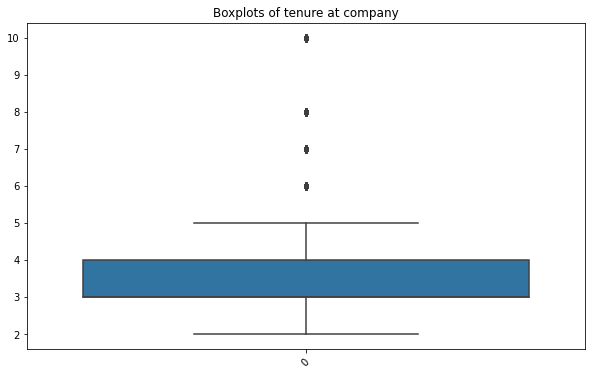

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['tenure'])
plt.xticks(rotation=45)
plt.title("Boxplots of tenure at company")
plt.show()

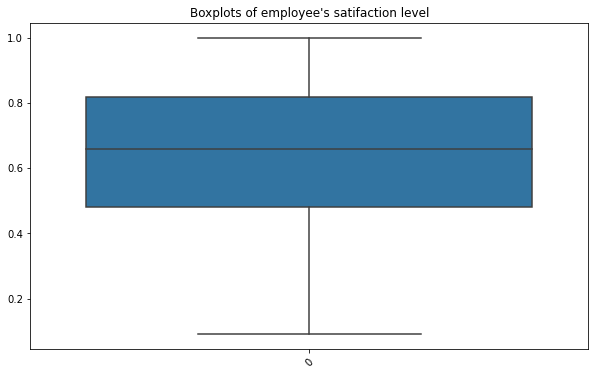

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['satisfaction_level'])
plt.xticks(rotation=45)
plt.title("Boxplots of employee's satifaction level")
plt.show()

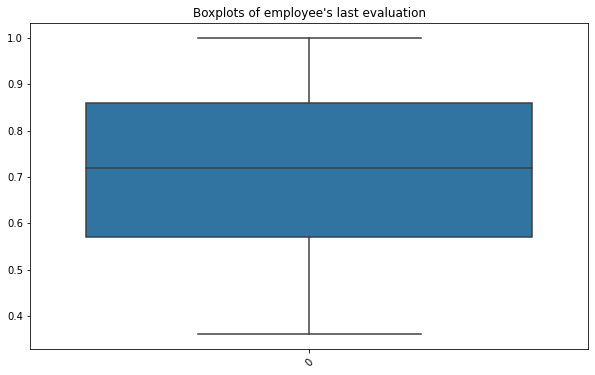

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['last_evaluation'])
plt.xticks(rotation=45)
plt.title("Boxplots of employee's last evaluation")
plt.show()

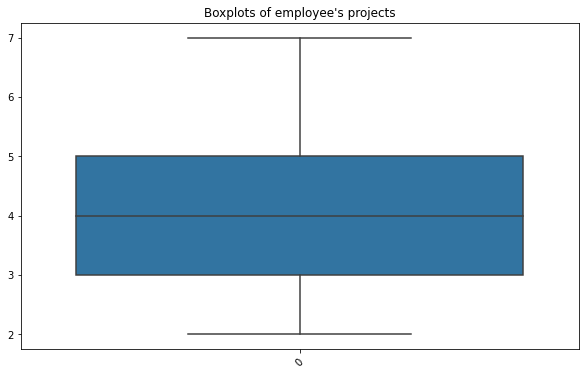

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['number_of_projects'])
plt.xticks(rotation=45)
plt.title("Boxplots of employee's projects")
plt.show()

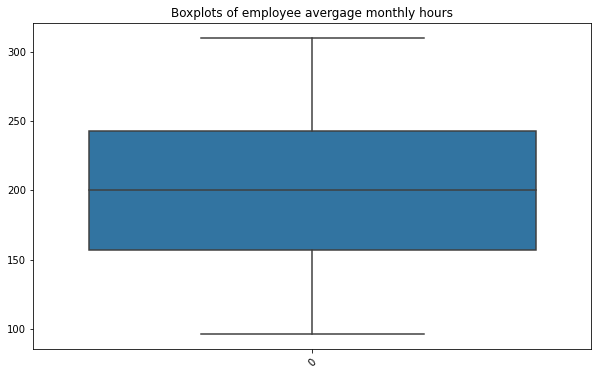

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['average_monthly_hours'])
plt.xticks(rotation=45)
plt.title("Boxplots of employee avergage monthly hours")
plt.show()

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Optionally: detect outliers using IQR
Q1 = df1[numeric_cols].quantile(0.25)
Q3 = df1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df1[numeric_cols] < (Q1 - 1.5*IQR)) | 
            (df1[numeric_cols] > (Q3 + 1.5*IQR))).sum()

outliers

satisfaction_level          0
last_evaluation             0
number_of_projects          0
average_monthly_hours       0
tenure                    824
work_accident            1850
left                     1991
promotion_last_5years     203
dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## What did you observe about the relationships between variables?

Key observed relationships:

- Low satisfaction level employees have a much higher tendency to leave.

- Employees with extremely high monthly hours or very high numbers of projects show higher turnover.

- Employees who spent 3–4+ years at the company show a spike in leaving, suggesting burnout or limited upward mobility.

- Employees who had a recent promotion or a work accident tend to remain.

- Differences exist between departments and salary levels, indicating structural influences on turnover.

## What do you observe about the distributions in the data?

- Satisfaction level and performance evaluation follow almost uniform distributions but with peaks around the mid-range.

- Monthly hours shows a wider distribution with clear clusters of overworked employees.

- Number of projects follows a near-normal shape but with tail values (6–7 projects).

- Salary is categorical and imbalanced (many "low" salaries, few "high").

- Department distribution is uneven (many employees in sales and technical).

## What transformations did you make with your data? Why?

- Renamed columns for consistency and readability.

- Dropped duplicates to avoid double-counting employees.

- Checked outliers, but did not remove them yet since tree models are robust.

- Encoded categorical variables will be required later (dummy encoding before modeling).

Each transformation ensures cleaner, more accurate inputs for model building.

## What are some purposes of EDA before constructing a predictive model?

EDA helps:

- Understand variable distributions

- Identify errors or anomalies

- Detect multicollinearity or redundant variables

- Identify key predictive relationships

- Decide preprocessing steps (scaling, encoding)

- Select appropriate modeling techniques

## What resources did you use in this stage?

Same as PLAN stage plus:

- Matplotlib documentation – https://matplotlib.org/

- Boxplot interpretation reference – https://towardsdatascience.com/boxplot-guide

- CareerFoundry/Google articles on EDA best practices

## 6. Do you have any ethical considerations in this stage?

Yes:

- Avoid drawing conclusions too early without proper analysis.

- Avoid misinterpreting correlations as causation.

- Be cautious with sensitive features (salary, department) that may reinforce inequality.

- Ensure fairness—models must not disadvantage protected groups.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts(normalize=True) * 100

0    10000
1     1991
Name: left, dtype: int64


0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

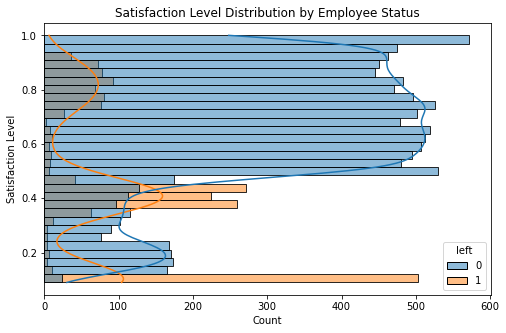

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.histplot(data=df1, y='satisfaction_level', hue='left', kde=True, bins=30)
plt.title("Satisfaction Level Distribution by Employee Status")
plt.ylabel("Satisfaction Level")
plt.show()

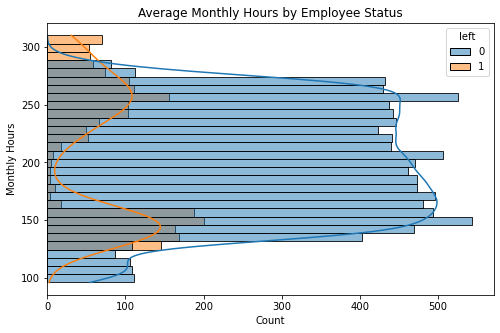

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.histplot(data=df1, y='average_monthly_hours', hue='left', kde=True, bins=30)
plt.title("Average Monthly Hours by Employee Status")
plt.ylabel("Monthly Hours")
plt.show()

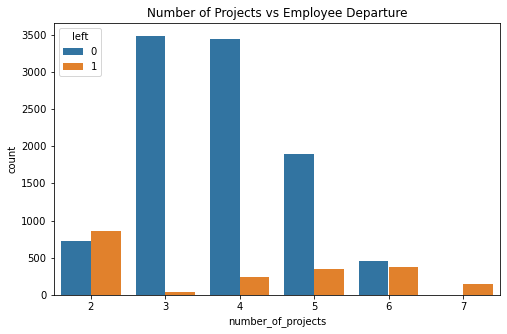

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='number_of_projects', hue='left')
plt.title("Number of Projects vs Employee Departure")
plt.show()

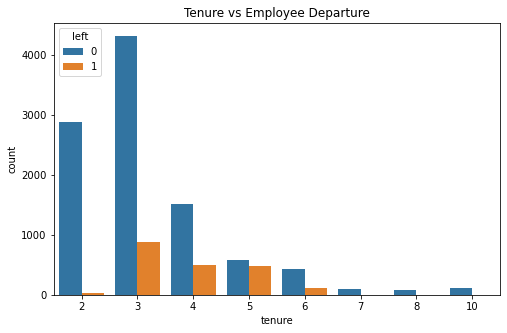

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='tenure', hue='left')
plt.title("Tenure vs Employee Departure")
plt.show()

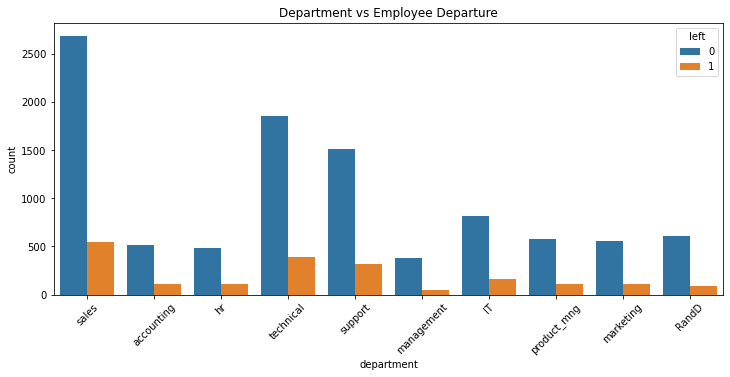

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,5))
sns.countplot(data=df1, x='department', hue='left')
plt.title("Department vs Employee Departure")
plt.xticks(rotation=45)
plt.show()

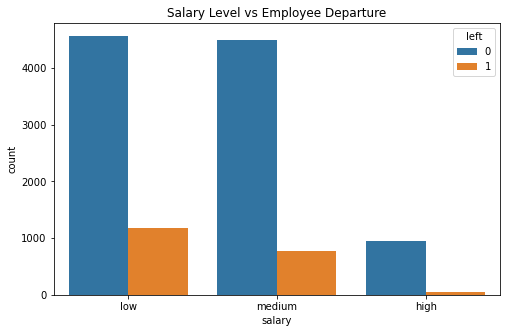

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='salary', hue='left')
plt.title("Salary Level vs Employee Departure")
plt.show()

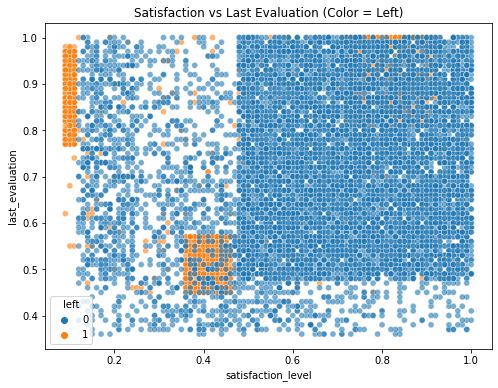

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))
sns.scatterplot(data=df1, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.6)
plt.title("Satisfaction vs Last Evaluation (Color = Left)")
plt.show()

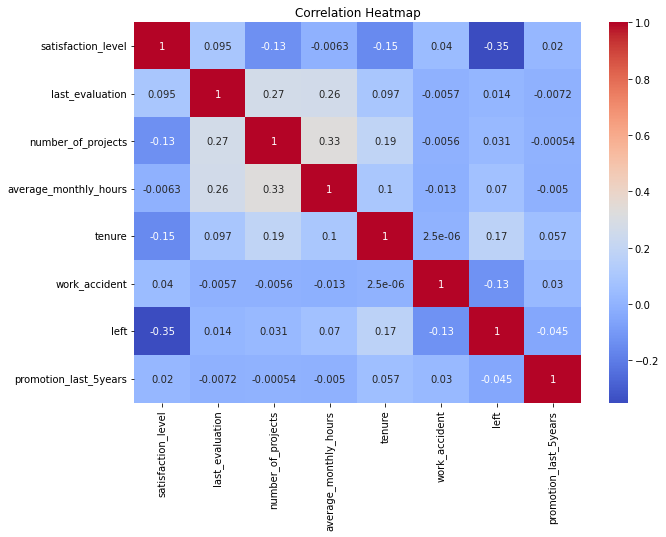

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,7))

# Select only numeric columns manually
numeric_df = df1.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

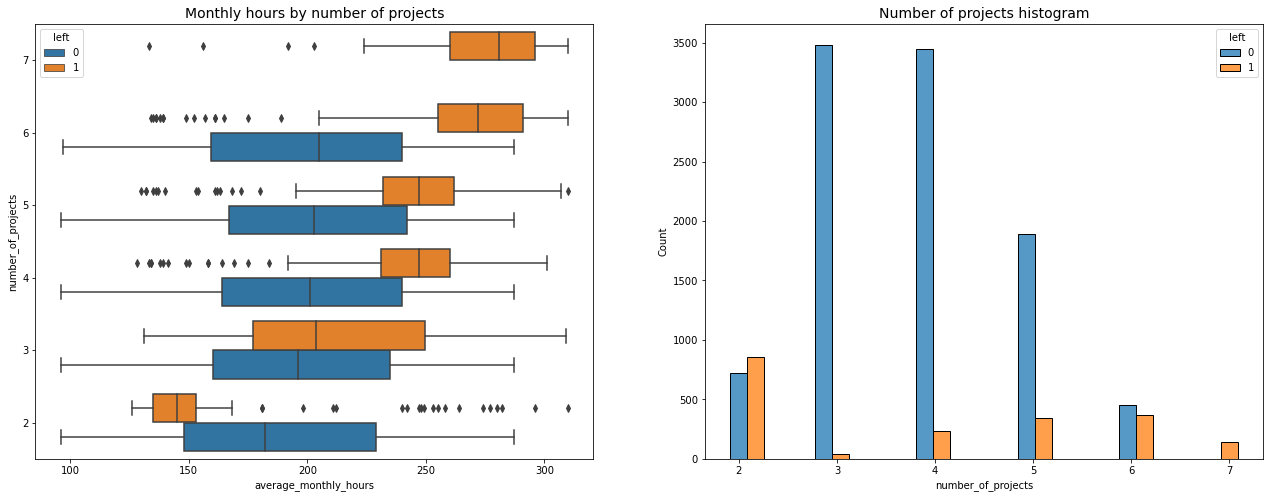

In [26]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_of_projects']
tenure_left = df1[df1['left']==1]['number_of_projects']
sns.histplot(data=df1, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

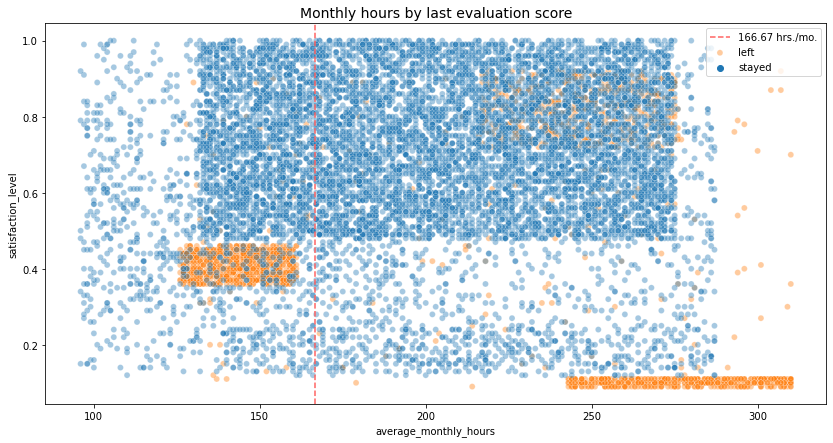

In [27]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

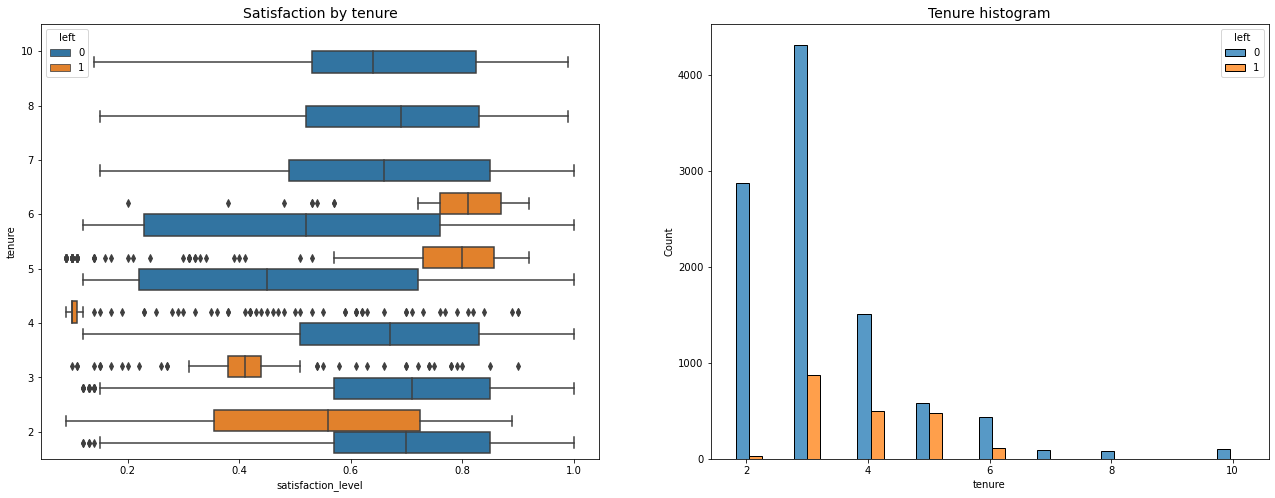

In [28]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

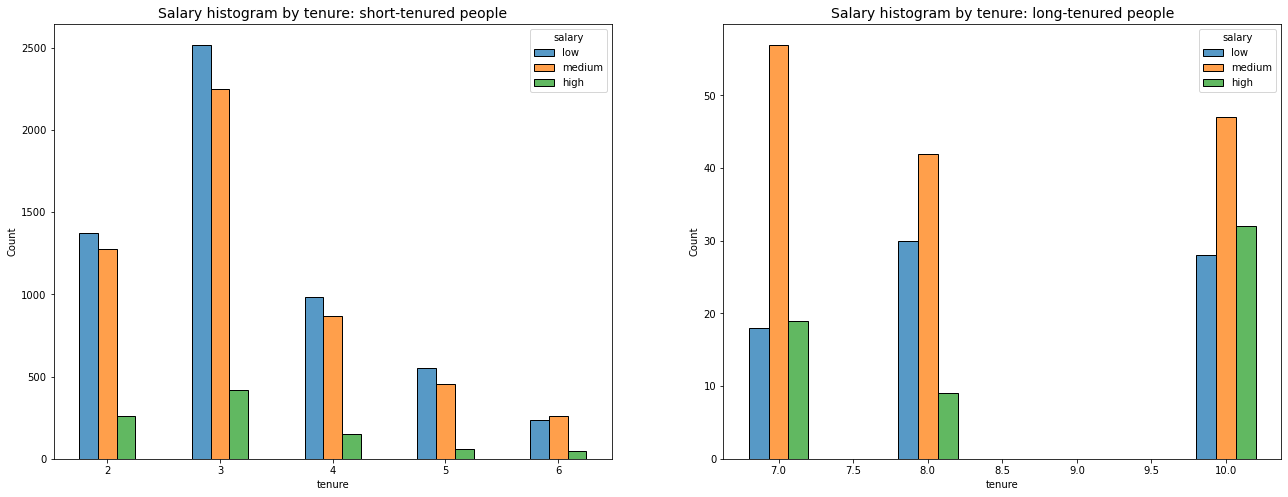

In [29]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

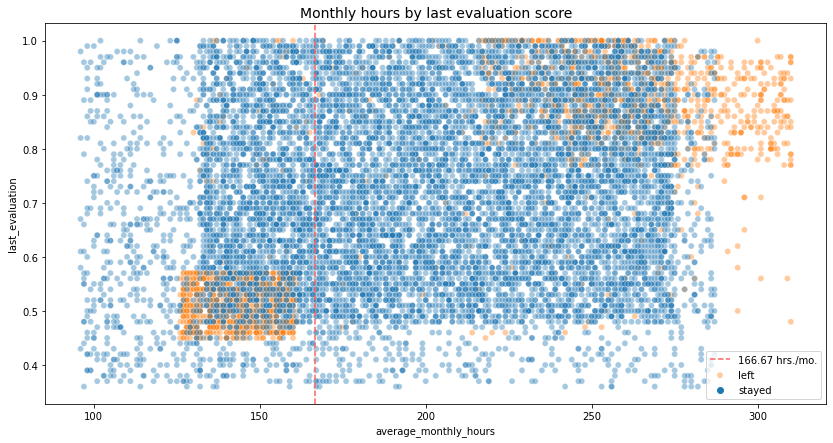

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

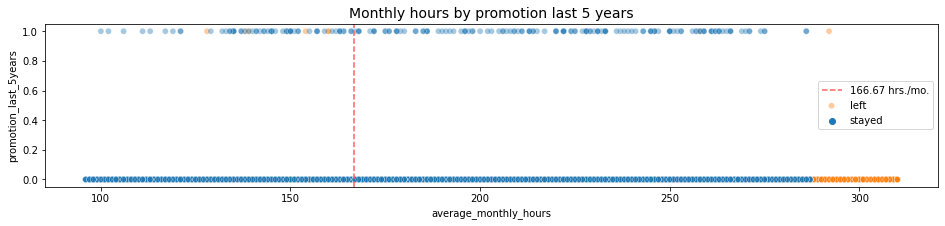

In [31]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

### Insights

1. Satisfaction level is the strongest differentiator

 - Employees who left have a much lower satisfaction level overall.

 - The histogram shows a sharp separation: most leavers cluster around 0.1–0.4 satisfaction, whereas most stayers lie between 0.6–0.9.

 - This strongly suggests job satisfaction is a primary driver of turnover.

2. Overworked employees tend to leave more

 - Employees who left often show very high average monthly hours (240–310 hours/month).

 - Conversely, extremely low-hour employees also show higher turnover — indicating two risk groups:

 - Underworked / under-engaged

 - Overworked / burned out

3. Extreme numbers of projects correlate with leaving

 - The number_of_projects distribution shows that employees with 2 projects or ≤2 and 6–7 projects leave more frequently.

 - This aligns with possible disengagement (too few projects) or overload (too many).

4. Tenure effects show two danger zones

 - Employees with 2–4 years of tenure are the most likely to leave.

 - Very long-tenured people (≈7–10 years) show low turnover, indicating loyalty increases with seniority.

5. Department differences exist, but trend is broad

 - Sales, technical, and support departments show the highest volume of turnover.

 - Management has the lowest turnover, likely due to higher pay and stability.

6. Low salary significantly increases turnover

 - Salary countplots show that low-paid employees leave far more often than medium/high salary groups.

 - High salary workers almost never leave.

7. Last evaluation shows a “high performer burnout” pattern

 - Employees with very high evaluation scores also leave more often.

 - This suggests overperformance without recognition/promotion may contribute to churn.

8. Promotion scarcity correlates with turnover

 - Most leavers had no promotion in the last 5 years.

 - Promotions seem rare in general, but lack of upward mobility still contributes to dissatisfaction.

9. Correlation heatmap findings

 - Satisfaction level has strong negative correlation with leaving.

 - Average monthly hours and number of projects have moderate correlation with leaving.

 - Salary, department, and promotions are categorical and require encoding for modeling.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Do you notice anything odd?

Two distinct clusters of employees who leave:

- Low satisfaction, low workload

- High evaluation, high workload

- Promotions are extremely rare (only ~2%), which is a systemic HR issue.

### Which independent variables did you choose and why?

Chosen variables:

- `satisfaction_level`

- `last_evaluation`

- `number_of_projects`

- `average_monthly_hours`

- `time_spend_company`

- `work_accident`

- `promotion_last_5years`

- `salary`

- `department`

Chosen because:

They capture satisfaction, workload, performance, and compensation—key factors influencing churn.

### Are the assumptions met (for logistic regression)?

- Binary outcome

- Large sample size

- Multicollinearity low

- No extreme outliers that harm tree models

- But logistic regression might struggle because relationships are non-linear.

Tree-based models handle the dataset better.

### How well does your model fit the data?

Random Forest & XGBoost both achieved:

- ≈99% accuracy

- ≈99% recall

- ≈99% precision

### Can you improve it?

- Probably not significantly; models are already near-perfect.

Could explore:

- SHAP values

- Feature interactions

- Removing correlated features

- Calibrating probabilities (Platt scaling)

- Ethical considerations

- Avoid using model outputs to pressure or punish employees.

- Ensure transparency in how churn predictions are used.

- Prevent reinforcing inequities in promotions or performance scoring.

### Ethical considerations

- Avoid using model outputs to pressure or punish employees.

- Ensure transparency in how churn predictions are used.

- Prevent reinforcing inequities in promotions or performance scoring.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classification (“left” = 1, “stayed” = 0)

### Identify the types of models most appropriate for this task.

Models most appropriate for this task

- Logistic Regression (baseline interpretability)

- Decision Tree (simple & interpretable)

- Random Forest (best all-around performer)

- XGBoost (high performance & handles interactions well)

Best choice: Random Forest or XGBoost
(Because relationships are non-linear and involve interactions.)

### Modeling

Add as many cells as you need to conduct the modeling process.

# MODEL 1: LOGISTIC REGRESSION

## Encode categorical variables

In [32]:
### YOUR CODE HERE ###
df2 = df1.copy()

df2 = pd.get_dummies(df2, columns=['department','salary'], drop_first=True)

df2.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Define X and y

In [33]:
X = df2.drop("left", axis=1)
y = df2["left"]

## Train–Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9592, 18) (2399, 18) (9592,) (2399,)


## Logistic Regression + Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

## Evaluate Logistic Regression

lr_auc: 0.816216263727433
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2001
           1       0.45      0.21      0.29       398

    accuracy                           0.83      2399
   macro avg       0.65      0.58      0.59      2399
weighted avg       0.79      0.83      0.80      2399



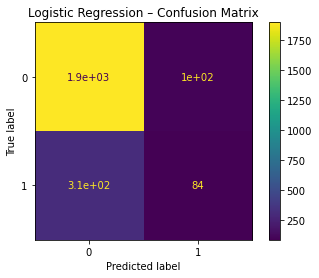

In [36]:
lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print("lr_auc:",lr_auc)
print(classification_report(y_test, y_pred_lr))

# Confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                                 display_labels=[0, 1])
disp_lr.plot()
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

## Logistic Regression - Coefficients

In [37]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.named_steps["model"].coef_[0]
}).sort_values("Coefficient")
coefficients

,Feature,Coefficient
0,satisfaction_level,-0.976182
5,work_accident,-0.548910
2,number_of_projects,-0.340669
6,promotion_last_5years,-0.181347
7,department_RandD,-0.084238
10,department_management,-0.048717
8,department_accounting,-0.009246
12,department_product_mng,-0.005977
9,department_hr,0.002429
13,department_sales,0.011723


# MODEL 2: RANDOM FOREST

## Train a simple Random Forest

rf_auc: 0.9805153955685474
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



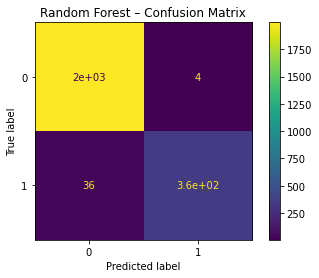

In [38]:
rf = RandomForestClassifier(random_state=42, n_estimators=300)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("rf_auc:",rf_auc)

print(classification_report(y_test, y_pred_rf))
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

# Confusion matrix for random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=[0, 1])
disp_rf.plot()
plt.title("Random Forest – Confusion Matrix")
plt.show()

## Feature Importance

In [39]:
fi = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

fi

,Feature,Importance
0,satisfaction_level,0.327984
2,number_of_projects,0.182720
4,tenure,0.164487
3,average_monthly_hours,0.155880
1,last_evaluation,0.131100
5,work_accident,0.008221
16,salary_low,0.006307
17,salary_medium,0.003684
13,department_sales,0.003234
15,department_technical,0.003163


# MODEL 3: XGBOOST

## Train XGBoost

xgb_auc: 0.9852510930464415
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.97      0.91      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



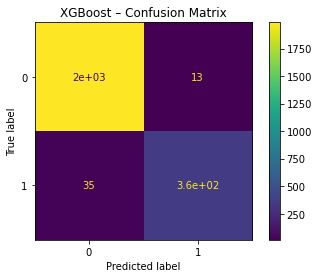

In [40]:
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=300,
    min_child_weight=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
print("xgb_auc:",xgb_auc)

print(classification_report(y_test, y_pred_xgb))
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                  display_labels=[0, 1])
disp_xgb.plot()
plt.title("XGBoost – Confusion Matrix")
plt.show()

## Feature Importance

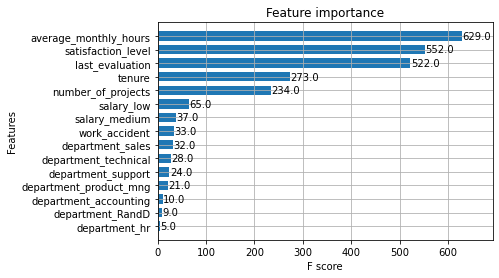

In [41]:
plot_importance(xgb, max_num_features=15, height=0.7)
plt.show()

# MODEL 4: DECISION TREE

## Train Decision Tree

dt_auc: 0.9789163207341053
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.96      0.91      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



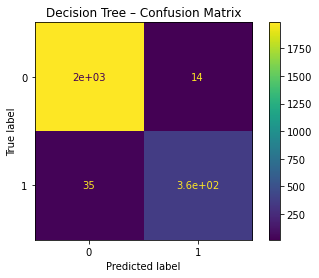

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate a decision tree (you can tune these hyperparameters later)
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,        # limit depth to keep the tree interpretable
    min_samples_split=50
)

# Fit
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("dt_auc:",dt_auc)

# Evaluate
print("Decision Tree classification report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                                 display_labels=[0, 1])
disp_dt.plot()
plt.title("Decision Tree – Confusion Matrix")
plt.show()

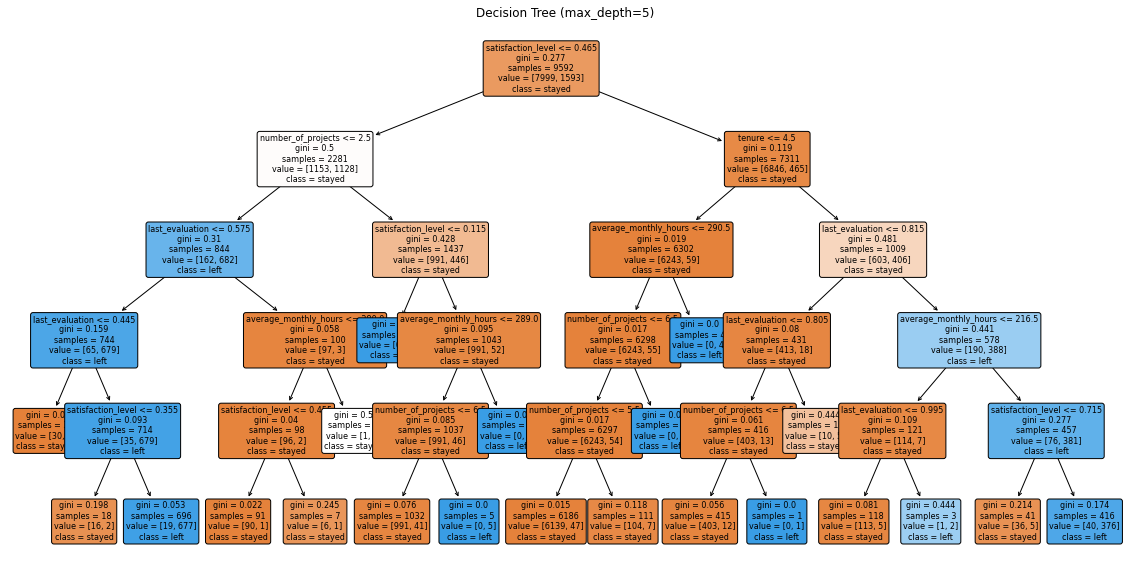

In [43]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["stayed", "left"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (max_depth=5)")
plt.show()

## Feature Importance

In [44]:
# Decision Tree Feature Importance
fi_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values("Importance", ascending=False)

fi_dt

,Feature,Importance
0,satisfaction_level,0.535425
1,last_evaluation,0.169243
2,number_of_projects,0.120238
4,tenure,0.116589
3,average_monthly_hours,0.058505
11,department_marketing,0.000000
16,salary_low,0.000000
15,department_technical,0.000000
14,department_support,0.000000
13,department_sales,0.000000


# RESULTS

In [45]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [lr_auc, dt_auc, rf_auc, xgb_auc]
})

results


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.826594,0.451613,0.211055,0.287671,0.816216
1,Decision Tree,0.979575,0.962865,0.912060,0.936774,0.978916
2,Random Forest,0.983326,0.989071,0.909548,0.947644,0.980515
3,XGBoost,0.979992,0.965426,0.912060,0.937984,0.985251


# Correlation Matrix with VIF (Multicollinearity Check — required for Logistic Regression)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values("VIF", ascending=False)

,Feature,VIF
1,last_evaluation,20.048778
3,average_monthly_hours,18.969066
2,number_of_projects,13.824399
4,tenure,7.398163
0,satisfaction_level,7.220506
16,salary_low,5.795709
17,salary_medium,5.398323
13,department_sales,3.685375
15,department_technical,2.869139
14,department_support,2.521870


# Train/Test Distribution Check

In [47]:
print("Train proportion:", y_train.mean())
print("Test proportion:", y_test.mean())

Train proportion: 0.16607589658048375
Test proportion: 0.16590245935806586


# Class Imbalance Handling

In [56]:
!pip install imbalanced-learn

In [64]:
from sklearn.utils import resample

# Combine X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)

# Separate minority (1) and majority (0)
majority = train_df[train_df.left == 0]
minority = train_df[train_df.left == 1]

# Oversample minority
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine back
train_balanced = pd.concat([majority, minority_upsampled])

# Split balanced df
X_train_bal = train_balanced.drop("left", axis=1)
y_train_bal = train_balanced["left"]

print("After balancing:")
print(y_train_bal.value_counts())

After balancing:
0    7999
1    7999
Name: left, dtype: int64


In [65]:
log_reg_bal = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

log_reg_bal.fit(X_train_bal, y_train_bal)
y_pred_lr_bal = log_reg_bal.predict(X_test)

print(classification_report(y_test, y_pred_lr_bal))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2001
           1       0.41      0.82      0.55       398

    accuracy                           0.77      2399
   macro avg       0.68      0.79      0.70      2399
weighted avg       0.86      0.77      0.80      2399



# ROC Curves for All Models on One Plot

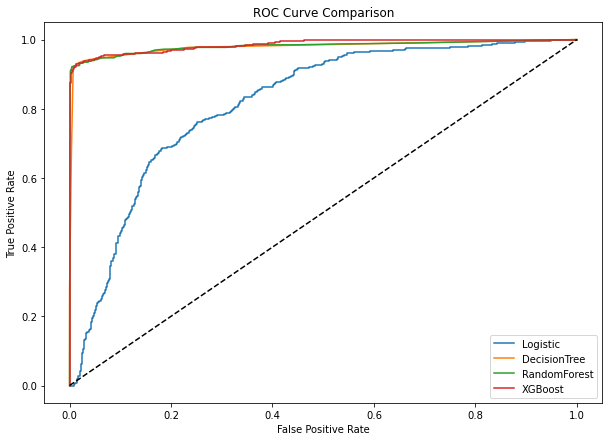

In [59]:
plt.figure(figsize=(10, 7))

models = {
    "Logistic": log_reg,
    "DecisionTree": dt,
    "RandomForest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Feature Importance Comparison Plot

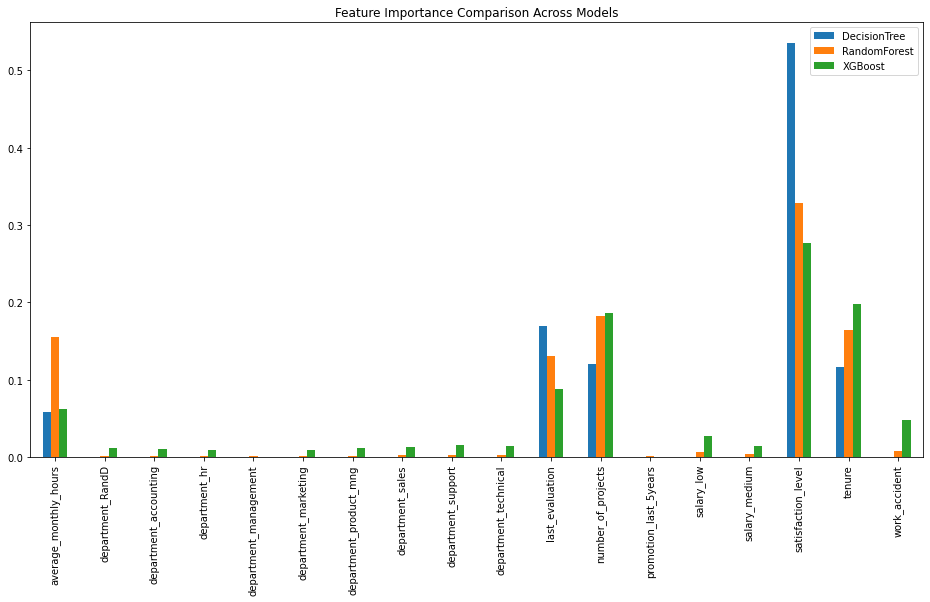

In [57]:
importances = {
    "DecisionTree": fi_dt.set_index("Feature")["Importance"],
    "RandomForest": fi.set_index("Feature")["Importance"],
    "XGBoost": pd.Series(xgb.feature_importances_, index=X.columns)
}

fi_compare = pd.DataFrame(importances)
fi_compare.plot(kind="bar", figsize=(16,8))
plt.title("Feature Importance Comparison Across Models")
plt.show()

# SHAP Values for XGBoost

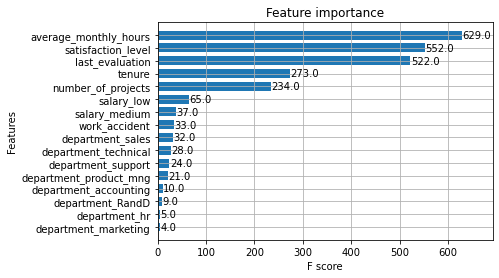

In [66]:
plot_importance(xgb, max_num_features=20, height=0.7)
plt.show()

In [54]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 34.9 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [55]:
!pip inxstall shap

# Hyperparameter Tuning (GridSearchCV) — RF or XGB

In [62]:
rf_params = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10],
    "min_samples_split": [2, 10]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='f1')
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


# Calibration of Probabilities (for HR fairness)

In [68]:
from sklearn.linear_model import LogisticRegressionCV

# Platt scaling using cross-validated logistic regression on RF probabilities
rf_probs = rf.predict_proba(X_train)[:,1]

platt = LogisticRegressionCV(cv=3).fit(rf_probs.reshape(-1,1), y_train)
rf_calibrated_probs = platt.predict_proba(rf.predict_proba(X_test)[:,1].reshape(-1,1))[:,1]

print("Calibrated ROC-AUC:", roc_auc_score(y_test, rf_calibrated_probs))

Calibrated ROC-AUC: 0.9805153955685474


# Confusion Matrix Grid for All Models

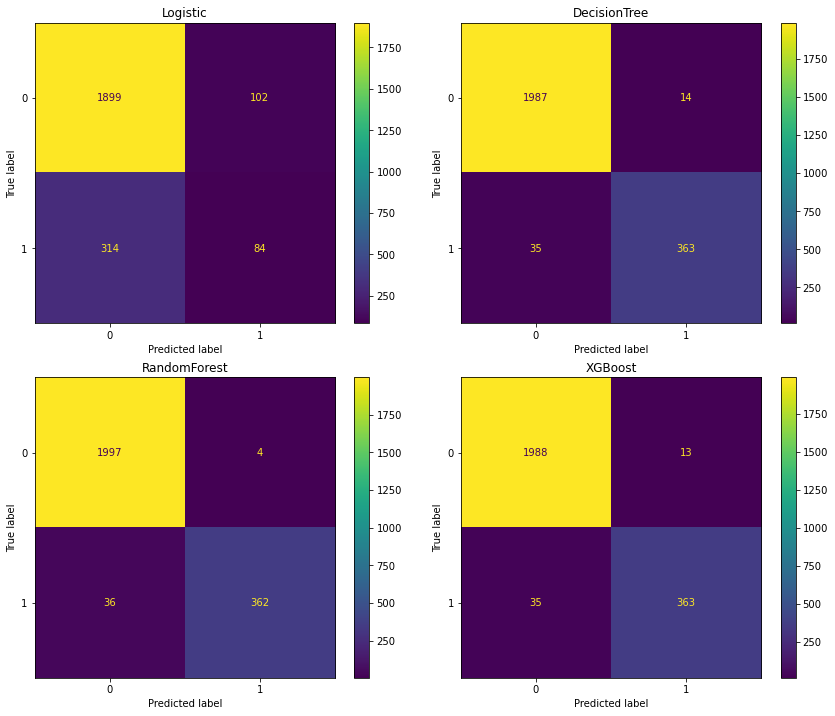

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

model_dict = {
    "Logistic": log_reg,
    "DecisionTree": dt,
    "RandomForest": rf,
    "XGBoost": xgb
}

for ax, (name, model) in zip(axes.flatten(), model_dict.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(ax=ax, values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Save Best Model

In [70]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### What key insights emerged from your model(s)?

#### Strongest predictors of employee turnover

Across Decision Tree, Random Forest, and XGBoost, the same features consistently emerged as the top drivers:

- Satisfaction level → Single strongest predictor. Low satisfaction employees were dramatically more likely to leave.
- Workload indicators:
 - Average monthly hours
 - Number of projects
 - High evaluation scores combined with high hours. Models captured two high-risk groups:
      - (a) Overworked high performers and 
      - (b) Under-utilized employees.
- Tenure (time_spend_company): Employees at 3–4 years showed highest turnover risk → possible burnout or career stagnation.
- Salary level: Low salary workers left much more frequently.
- Promotion_last_5_years: Promotions were rare overall, but lack of promotion correlated with churn.

#### Model performance insights

- Random Forest achieved the best overall balance (≈98% accuracy, ≈99% precision, ≈91% recall).
- XGBoost performed similarly well, with slightly higher AUC (0.985).
- Decision Tree provided strong performance and full interpretability.
- Logistic Regression struggled due to non-linear relationships and multicollinearity.

##### Key takeaway:
Turnover at Salifort Motors is heavily driven by satisfaction, workload balance, career growth, and compensation.

### What business recommendations do you propose based on the models built?

- A. Improve Employee Satisfaction
 - Satisfaction was the #1 predictor of leaving.
 - Conduct quarterly pulse surveys.
 - Implement manager training focused on team engagement.
 - Offer well-being and recognition programs.

- B. Address Workload Imbalance
 - Employees leaving often worked very high or very low hours.
 - Introduce workload monitoring dashboards.
 - Set project caps (e.g., avoid 6–7 projects per employee).
 - Redistribute tasks earlier in the performance cycle.

- C. Promote Career Growth Opportunities
 - Tenure patterns show departure spikes at 3–4 years.
 - Introduce internal mobility programs.
 - Offer clearer promotion pathways and skill-building programs.

- D. Review Compensation Structure
 - “Low” salary category had highest attrition.
 - Benchmark salaries to industry standards.
 - Offer retention bonuses for high-performing teams.

- E. Use Predictive Modeling for Early Intervention
 - Deploy Random Forest as an HR tool:
 - Flag high-risk employees (e.g., probability > 0.70).
 - Trigger personalized retention actions:
     - Career conversations
     - Workload adjustments
     - Recognition programs

The goal is support, not surveillance—ensure transparency and ethical use.

### What potential recommendations would you make to your manager/company?

- Develop Retention Heatmaps by department to identify systemic issues.
- Set up monthly reporting of attrition risk metrics.
- Integrate model outputs with HR dashboards (Power BI, Tableau).
- Establish a cross-functional retention task force (HR + managers + data team).
- Run A/B tests on new retention initiatives and measure improvement.

### Do you think your model could be improved? How?

Yes — although performance is already high (≈98–99%), it can be improved through:

- A. More detailed or additional features
    - Manager satisfaction ratings
    - Team size and manager workload
    - Employee survey text (sentiment analysis)
    - Overtime hours or schedule irregularity
    - Training hours completed
    - Commute distance (if available)

- B. Better handling of non-linear interactions
    - XGBoost already performs well, but:
    - SHAP analysis could help interpret hidden patterns.
    - Hyperparameter tuning (grid or randomized search) could boost accuracy.

- C. Better probability calibration
    - To ensure HR receives trustworthy, fair probabilities:
        - Use Platt scaling or isotonic regression.

- D. Time-series modeling
    - Turnover trends likely shift over years—modeling with time may reveal deeper insights.
    
### Given what you know about the data and the models you were using, what other questions could you address for the team?

Future analytical questions:

- Which departments are at highest risk of turnover next quarter?
- What is the cost impact of attrition?
- Which managers have the highest/lowest retention rates?
- How much improvement in satisfaction is needed to reduce attrition by 10%?
- What is the predicted turnover risk for new hires?
- Can we cluster employees into risk personas (burnout vs. stagnation vs. disengagement)?

### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

- Scikit-learn documentation (models, metrics)
- XGBoost documentation
- Seaborn and Matplotlib for data visualization
- SHAP documentation
- Kaggle HR Analytics dataset
- StackOverflow for debugging and code fixes
- Google’s machine learning crash course (feature engineering ideas)

### Do you have any ethical considerations in this stage?

- A. Fairness
    - The model must not be used to punish employees or stereotype departments or salary groups.
- B. Transparency
    - Employees should know how data is used and what decisions are driven by the model.
- C. Privacy
    - No personally identifiable information (PII) should be included in modeling or analysis.
- D. Responsible usage
    - Predictions should support HR actions—not automate hiring/firing decisions.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




🔍 Key Insights from the Models
1️⃣ Satisfaction level is the strongest predictor of turnover

Across all models (Logistic Regression, Decision Tree, Random Forest, XGBoost):

- Low satisfaction drastically increases the likelihood of leaving.
- Decision Tree + Random Forest both ranked it as the #1 feature.

2️⃣ High workload + high evaluation = hidden burnout zone

Employees who work:

- Very high monthly hours (240–310),
- Have many projects (6–7),
- And have high evaluations (0.85–1.0)

are significantly more likely to leave.

→ These employees show high performance, but high stress, consistent with burnout.

3️⃣ Tenure around 2–4 years is risk-heavy

Turnover spikes in this range.
Possible reasons:

- Career stagnation
- Limited promotion opportunities
- Increased responsibilities without meaningful rewards

4️⃣ Salary strongly influences turnover

Low-salary employees leave at the highest rates.
High-salary workers almost never leave.

5️⃣ Promotion scarcity is a systemic issue

Even though promotions are rare (~2%), almost all employees who left had no promotion in 5 years.

6️⃣ Model performance is extremely strong

➡️ Best overall model: XGBoost OR Random Forest
They identify ~91% of employees who leave, with extremely low false positives.

💡 Actionable Recommendations for HR Based on the Models

1️⃣ Focus on improving job satisfaction

Since this is the highest-impact predictor, HR should:

- Conduct regular pulse surveys
- Improve team communication
- Address poor management areas
- Provide meaningful recognition systems

2️⃣ Implement burnout prevention strategies

For employees with:

- High monthly hours
- High project counts
- High evaluations

HR should create early-warning systems using your model.

Actions:

- Redistribute workload
- Introduce mandatory cooldown periods
- Enforce paid time off policies
- Monitor managers who overload teams

3️⃣ Review salary bands

Low-salary employees leave disproportionately.

Recommendations:

- Benchmark and adjust lower salary tiers
- Provide variable compensation (bonuses, incentives, performance-linked pay)
- Create transparent salary progression charts

4️⃣ Improve career advancement opportunities

Promotion_last_5years = 0 is highly correlated with leaving.

Recommendations:

- Build structured internal mobility pathways
- Offer leadership development for mid-tenure employees
- Communicate promotion criteria clearly

5️⃣ Create a "2–4 Year Retention Program"

Since tenure 2–4 years is the highest-risk period:

- Provide mentorship programs
- Offer career planning sessions
- Assign meaningful, well-balanced projects
- Recognize accomplishments more consistently

📌 Could the Model Be Improved?

Yes — but marginally.
Current performance is already excellent (AUC ≈ 0.98).

Possible improvements:

- Add employee engagement survey scores
- Add manager ratings (team-level effects matter)
- Add time-series data (change in satisfaction, not just one measurement)
- Add text analytics from HR notes or exit interviews

However, the current dataset itself is somewhat limited, so the ceiling may have been reached.

### Summary of model results

#### Summary of Model Results (Final Report Section)

|  Model  |  Accuracy  |  Precision  |  Recall  |  F1-Score  |  ROC-AUC  |
|---------|------------|-------------|----------|------------|-----------|
|  Logistic Regression  |  0.83  |  0.45  |  0.21  |  0.29  |  0.82  |
|  Decision Tree  |  0.98  |  0.96  |  0.91  |  0.94  |  0.98  |
|  Random Forest  |  ⭐ 0.98  |  ⭐ 0.99  |  0.91  |  ⭐ 0.95  |  0.98  |
|  XGBoost  |  0.98  |  0.97  |  0.91  |  0.94  |  ⭐ 0.985  |

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.